# Audio Features Extraction Testing

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load file and Check the file

In [2]:
# Define the path to audio file
audio_path = "./AudioFiles/TestAudio.mp3"
audio_data, sample_rate = librosa.load(audio_path)

print(type(audio_data), type(sample_rate))

<class 'numpy.ndarray'> <class 'int'>


In [3]:
# Print the sample rate and audio data
print(f"Sample rate: {sample_rate}")
print(f"Audio data: {audio_data}")
print(f"Audio shape: {audio_data.shape}")

Sample rate: 22050
Audio data: [0. 0. 0. ... 0. 0. 0.]
Audio shape: (4324352,)


### Play Audio

In [4]:
ipd.Audio(audio_path)

### Chnage the sample rate
The above selected audio time series as a numpy array with a default sampling rate(sr).
Audio will be automatically resampled to the given rate (default sr=22050 ).

In [5]:
audio_data, sample_rate = librosa.load(audio_path, sr=44100)

In [7]:
# Print the sample rate and audio data
print(f"Audio data: {audio_data}")
print(f"Sample rate: {sample_rate}")
print(f"Audio shape: {audio_data.shape}")

Audio data: [0. 0. 0. ... 0. 0. 0.]
Sample rate: 44100
Audio shape: (8648704,)


## Audio Signals / Waveform Visualization

### Visualization using librosa (Recommended)

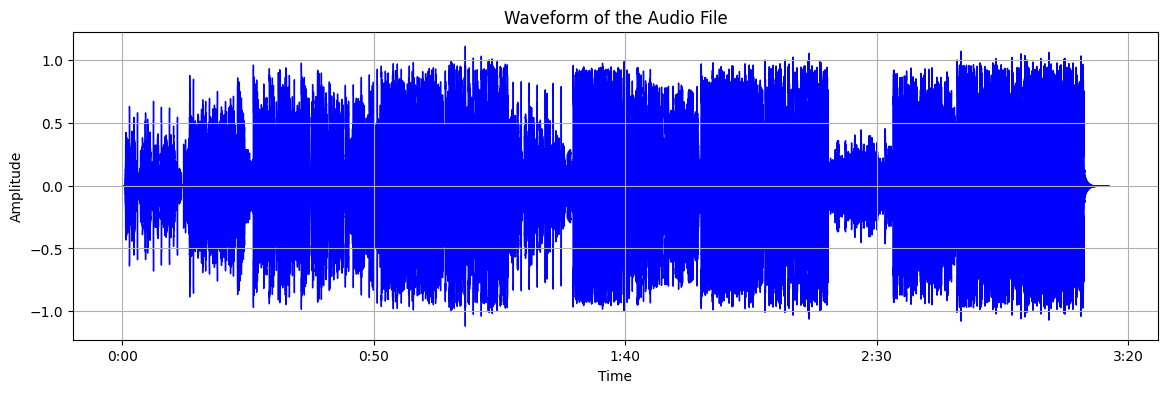

In [8]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio_data, sr=sample_rate, color='blue')

# Set the title for the plot
plt.title('Waveform of the Audio File')

# Set the x and y labels
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Add a grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

### Visualization without librosa

In [26]:
# # Plot the waveform visualization
# plt.figure(figsize=(14, 4))
# plt.plot(audio_data)
# plt.title('Waveform Visualization')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.show()

## Spectrogram Visualization

### Compute the Mel spectrogram

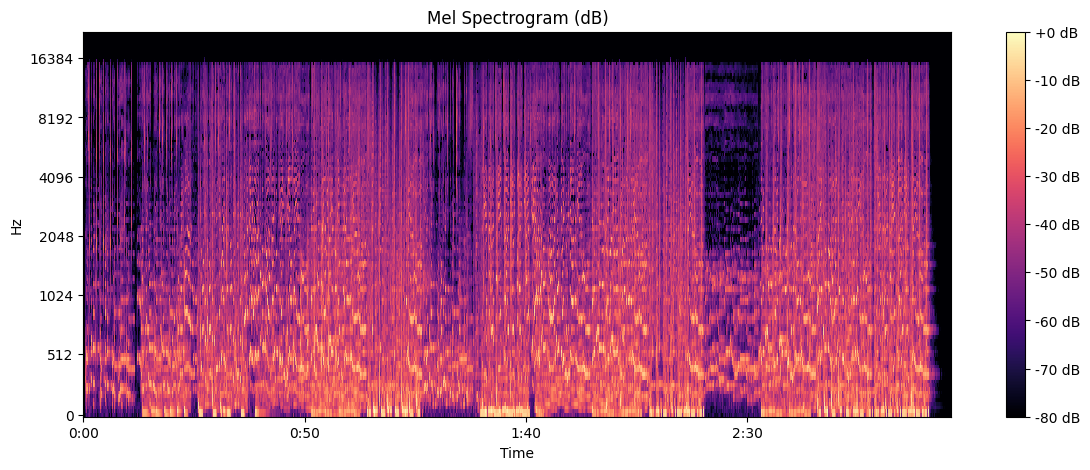

In [9]:
# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

# Convert to decibels (dB)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate)
plt.title('Mel Spectrogram (dB)')
plt.colorbar(format='%+2.0f dB')
plt.show()

### Compute the onset strength

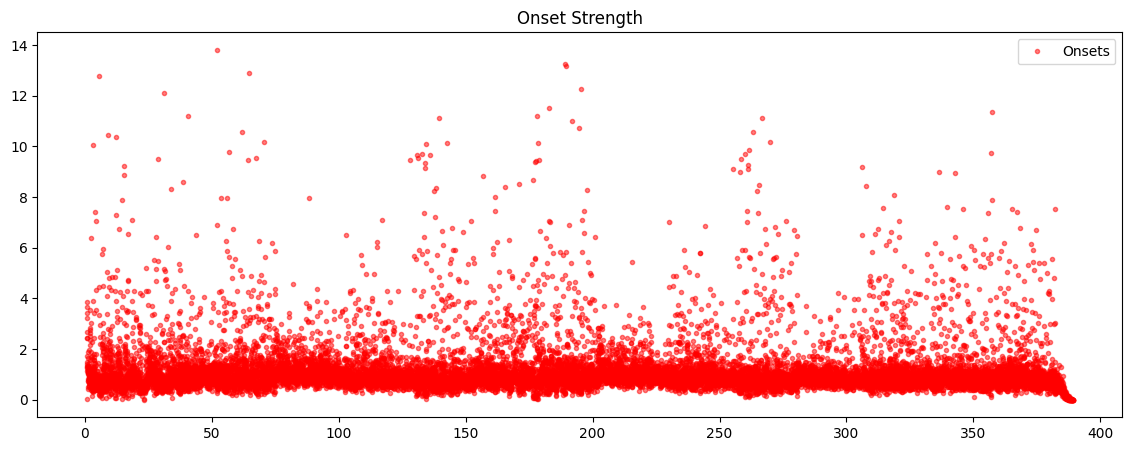

In [10]:
# Compute the onset strength
onset_strength = librosa.onset.onset_strength(y=audio_data, sr=sample_rate)

# Display the onset strength
plt.figure(figsize=(14, 5))
plt.plot(librosa.frames_to_time(onset_strength.nonzero()[0]), onset_strength[onset_strength.nonzero()[0]], 'r.', alpha=0.5, label='Onsets')
plt.legend()
plt.title('Onset Strength')
plt.show()

### Extract Additional Audio Features

#### Pitch Variability
To measure pitch variability, you can compute the pitch contour of the audio using the librosa.core.pitch module and then calculate its standard deviation:

In [35]:
# Compute the pitch contour
pitch, magnitudes = librosa.core.piptrack(y=audio_data, sr=sample_rate)

# Calculate the standard deviation of pitch
pitch_std = np.std(pitch)

print(f"Pitch Variability (Standard Deviation): {pitch_std}")


Pitch Variability (Standard Deviation): 140.20571899414062


#### Pitch and Pitch Variation
- To extract pitch and pitch variation, you can use the librosa.feature.chroma_stft function. 
- This feature is often used for music analysis but can also provide insights into emotional changes in spoken audio:

In [55]:
chromagram = librosa.feature.chroma_stft(y=audio_data, sr=sample_rate)

# Calculate the pitch as the mean of the chromagram
pitch = np.mean(chromagram, axis=1)

# Calculate pitch variation as the standard deviation
pitch_variation = np.std(chromagram, axis=1)

print("Pitch (Chromagram):", pitch)
print("Pitch Variation (Chromagram):", pitch_variation)

Pitch (Chromagram): [0.3451874  0.4039377  0.32631177 0.2839332  0.28047264 0.2745967
 0.37144864 0.29431155 0.37968484 0.37382856 0.3095553  0.3923823 ]
Pitch Variation (Chromagram): [0.30408594 0.37512025 0.32829684 0.2847315  0.31224737 0.26994732
 0.37547126 0.2583534  0.34831882 0.3367593  0.27174094 0.3790142 ]


#### Tone and Intensity
To analyze tone and intensity, you can compute the zero-crossing rate and RMS (Root Mean Square) energy of the audio as follows:

In [38]:
# Compute zero-crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(y=audio_data)

# Compute RMS energy
rms = librosa.feature.rms(y=audio_data)

print(f"Mean Zero-Crossing Rate: {np.mean(zero_crossings)}")
print(f"Mean RMS Energy: {np.mean(rms)}")

Mean Zero-Crossing Rate: 0.05950154904213283
Mean RMS Energy: 0.21885313093662262


#### Vocal Tension
Vocal tension is a complex feature to extract and usually requires more advanced models like prosody analysis. However, you can get a basic estimate using spectral flatness:

In [39]:
# Compute spectral flatness
spectral_flatness = librosa.feature.spectral_flatness(y=audio_data)

print(f"Mean Spectral Flatness: {np.mean(spectral_flatness)}")


Mean Spectral Flatness: 0.0014149246271699667


#### Zero Crossing Rate
- The zero-crossing rate is the rate of sign-changes along with a signal
- It measures the number of times a signal changes from positive to negative or back
- It can be useful to find the frequency of a signal
- A high zcr indicates that there are many peaks and valleys in the waveform, which means it's not very smooth.
- A low zcr indicates that there are fewer peaks and valleys in the waveform, which means it's smoother.

In [40]:
audio_data.shape

(8648704,)

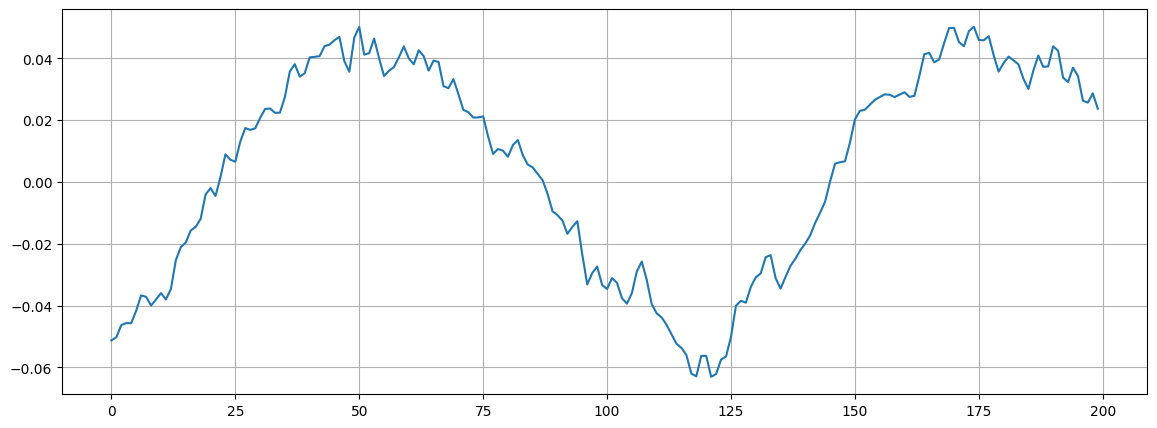

In [52]:
# Get a part of the audio file
n0 = 20000
n1 = 20200
partial_audio_data = audio_data[n0:n1]

plt.figure(figsize=(14, 5))
plt.plot(partial_audio_data)
plt.grid()

In [53]:
zero_crossings = librosa.zero_crossings(partial_audio_data, pad=False)
print(sum(zero_crossings))

3


In [54]:
zero_crossings = librosa.zero_crossings(audio_data, pad=False)
print(sum(zero_crossings))

514888


In [58]:
# Compute zero-crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(y=audio_data)

# Calculate the mean zero-crossing rate
zero_crossing_rate_mean = np.mean(zero_crossings)

print("Mean Zero-Crossing Rate:", zero_crossing_rate_mean)


Mean Zero-Crossing Rate: 0.05950154904213283


#### Energy Features
- To extract energy features (a measure of loudness), you can use the librosa.feature.rmse function:

In [56]:
rmse = librosa.feature.rms(y=audio_data)

# Calculate the mean and standard deviation of energy
energy_mean = np.mean(rmse)
energy_std = np.std(rmse)

print("Energy Mean (RMS):", energy_mean)
print("Energy Standard Deviation (RMS):", energy_std)

Energy Mean (RMS): 0.21885313
Energy Standard Deviation (RMS): 0.10983974


#### Statistical Features
- Calculate statistical features (mean, standard deviation, skewness, and kurtosis) of the audio signal directly:

In [57]:
import scipy.stats

# Calculate the mean, standard deviation, skewness, and kurtosis
mean = np.mean(audio_data)
std = np.std(audio_data)
skewness = scipy.stats.skew(audio_data)
kurtosis = scipy.stats.kurtosis(audio_data)

print("Mean:", mean)
print("Standard Deviation:", std)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Mean: 0.00014700324
Standard Deviation: 0.24487749
Skewness: -0.002854522907653308
Kurtosis: 0.6550308883324081
